## PCA (Principal component Analysis)

In [6]:
import pandas as pd

main_df = pd.read_csv('22data.csv')
main_df.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,0.385,0.689,95,2061,97,60,31,50,14,1039
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,0.443,0.761,109,2443,103,66,1,36,13,1030
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,0.390,0.695,99,2119,95,83,12,43,10,1095
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,0.409,0.731,102,2268,131,63,12,50,23,1133
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,0.387,0.698,94,2097,130,84,19,36,16,1100


In [7]:
main_df.drop('Tm', inplace=True, axis=1)

In [8]:
main_df.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,57,26.5,4.33,162,6027,5351,702,1232,262,24,...,0.385,0.689,95,2061,97,60,31,50,14,1039
1,53,27.5,4.87,162,6082,5509,789,1394,298,11,...,0.443,0.761,109,2443,103,66,1,36,13,1030
2,58,27.0,4.16,162,6049,5429,674,1281,275,25,...,0.390,0.695,99,2119,95,83,12,43,10,1095
3,54,28.8,4.54,162,6144,5539,735,1427,352,12,...,0.409,0.731,102,2268,131,63,12,50,23,1133
4,64,27.9,4.06,162,6072,5425,657,1293,265,31,...,0.387,0.698,94,2097,130,84,19,36,16,1100


In [9]:
X = main_df.iloc[:, 0:27]
X.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,57,26.5,4.33,162,6027,5351,702,1232,262,24,...,0.304,0.385,0.689,95,2061,97,60,31,50,14
1,53,27.5,4.87,162,6082,5509,789,1394,298,11,...,0.317,0.443,0.761,109,2443,103,66,1,36,13
2,58,27.0,4.16,162,6049,5429,674,1281,275,25,...,0.305,0.390,0.695,99,2119,95,83,12,43,10
3,54,28.8,4.54,162,6144,5539,735,1427,352,12,...,0.321,0.409,0.731,102,2268,131,63,12,50,23
4,64,27.9,4.06,162,6072,5425,657,1293,265,31,...,0.311,0.387,0.698,94,2097,130,84,19,36,16


In [10]:
y = main_df.iloc[:, 0:27]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [13]:
X_train = pd.DataFrame(X_train, columns =['BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP',
       'HBP', 'SH', 'SF', 'IBB', 'LOB'])
X_train.head(10)
X_train.describe().round(3)


,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,24.000,24.000,24.000,24.0,24.000,24.000,24.000,24.000,24.000,24.000,...,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000,24.000
mean,0.000,-0.000,-0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
std,1.022,1.022,1.022,0.0,1.022,1.022,1.022,1.022,1.022,1.022,...,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022,1.022
min,-1.888,-1.856,-1.875,0.0,-2.277,-1.845,-1.880,-2.200,-1.606,-1.587,...,-2.523,-1.992,-2.262,-1.687,-2.074,-1.840,-1.493,-1.604,-2.074,-1.202
25%,-0.831,-0.861,-0.622,0.0,-0.673,-0.605,-0.628,-0.731,-0.655,-0.783,...,-0.558,-0.584,-0.582,-0.669,-0.623,-1.031,-0.804,-0.838,-0.829,-0.626
50%,-0.151,0.049,-0.014,0.0,0.039,-0.232,-0.019,-0.048,-0.072,-0.227,...,0.165,-0.246,-0.229,-0.017,-0.243,0.055,-0.233,-0.139,0.087,-0.232
75%,0.793,0.769,0.595,0.0,0.838,0.666,0.595,0.862,0.519,1.010,...,0.558,0.964,0.891,0.843,0.875,0.744,0.614,0.794,0.677,0.374
max,1.737,1.786,2.152,0.0,1.927,2.180,2.146,1.754,2.645,2.123,...,1.779,1.857,1.858,1.756,1.812,1.674,2.208,2.392,1.593,2.434


In [14]:
from sklearn.decomposition import PCA

pca1 = PCA(0.95)
pca1.fit(X_train)
X_pca2 = pca1.fit_transform(X_train)
pca1.explained_variance_ratio_



array([0.49569109, 0.10877402, 0.09155913, 0.07097229, 0.04730829,
       0.04393101, 0.03594348, 0.02970234, 0.02093399, 0.01578169])

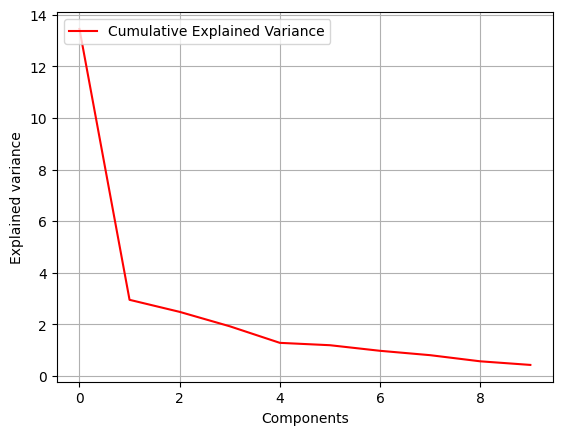

In [15]:
import matplotlib.pyplot as plt
import numpy as np

ratios = pca1.explained_variance_ratio_
vals = [i for i in range(1, len(ratios))]

plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(pca1.explained_variance_,
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Giving the parameter of n_components

In [16]:
pca1c = PCA(n_components=2)
X_pca2c = pca1c.fit_transform(X_train)
colormap = plt.cm.get_cmap('coolwarm')


C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_30692\2222192497.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_30692\3720080986.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1], cmap=colormap)


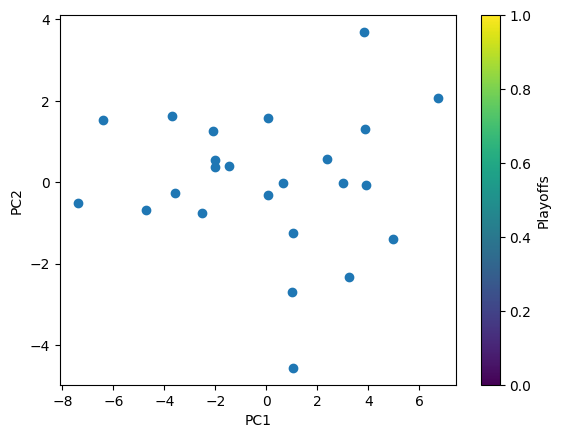

In [17]:
plt.figure()
scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1], cmap=colormap)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Playoffs')
plt.show()

In [18]:
pca3c = PCA(n_components=3)
X_pca3c = pca3c.fit_transform(X_train)
pca3c.explained_variance_ratio_


array([0.49569109, 0.10877402, 0.09155913])

## Pure Math Implementation

In [19]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        # Step 1 — Mean-center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2 — Compute covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # Step 3 — Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Step 4 — Sort eigenvalues (descending)
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]

        # Save the top-k components
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

    def transform(self, X):
        # Project data on the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


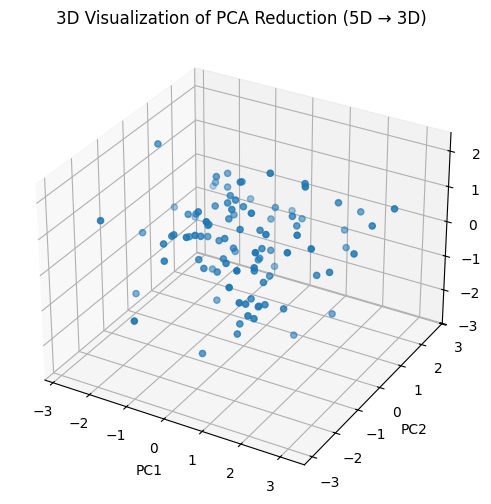

In [20]:
# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 5)  
X[:, 2] = X[:, 0] * 0.7 + X[:, 1] * 0.2 + np.random.randn(100) * 0.1  # Add correlation

# ----- Apply PCA (5D → 3D) -----
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# ----- Visualization: 3D Plot of PCA Result -----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

ax.set_title("3D Visualization of PCA Reduction (5D → 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

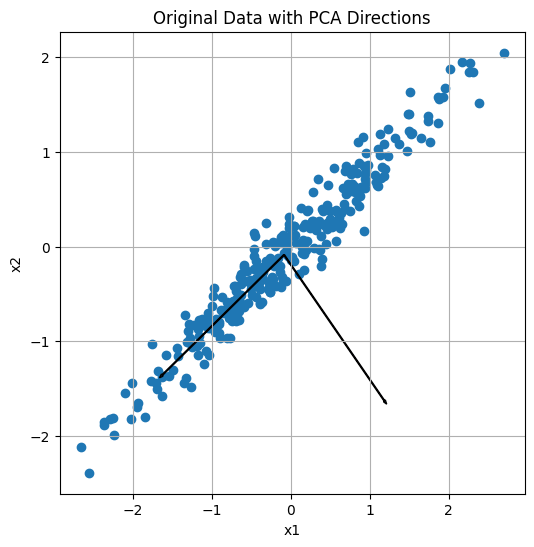

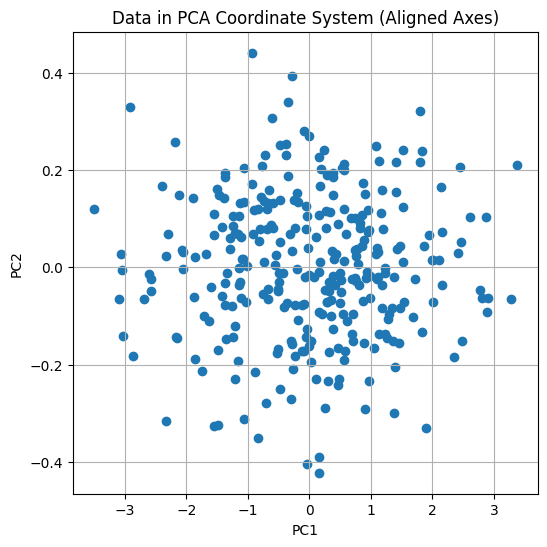

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D correlated data
np.random.seed(0)
X = np.random.randn(300, 2)
X[:, 1] = X[:, 0] * 0.8 + np.random.randn(300) * 0.2  # correlation

# PCA implementation
X_centered = X - np.mean(X, axis=0)
cov = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov)
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[:, idxs]
PCs = eigenvectors

# Project data
X_transformed = X_centered @ PCs

# ---- Plot 1: Original Data + PCA Directions ----
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
origin = np.mean(X, axis=0)

# Plot principal components as arrows
for length, vec in zip(eigenvalues, PCs.T):
    plt.arrow(origin[0], origin[1],
              vec[0] * 2, vec[1] * 2,
              width=0.01)

plt.title("Original Data with PCA Directions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

# ---- Plot 2: Data After PCA Transform ----
plt.figure(figsize=(6, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title("Data in PCA Coordinate System (Aligned Axes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


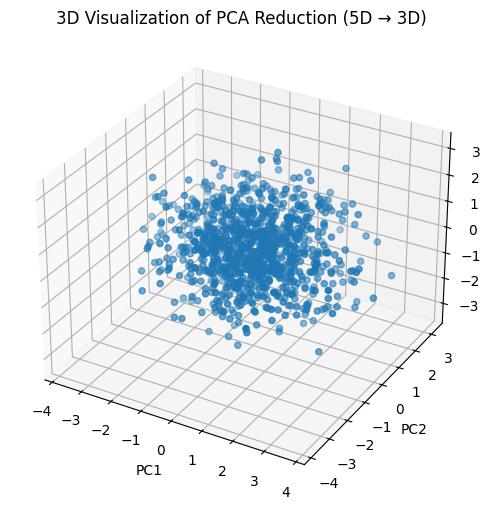

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def power_method(A, tol=1e-6, max_iters=5000):
    n = A.shape[0]
    x = np.random.rand(n)
    x /= np.linalg.norm(x)

    for _ in range(max_iters):
        x_next = A @ x
        x_next /= np.linalg.norm(x_next)

        if np.linalg.norm(x_next - x, ord=np.inf) < tol:
            break

        x = x_next

    eigenvalue = x.T @ A @ x
    return eigenvalue, x


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.explained_variance = None
        self.mean = None

    def fit(self, X):
        # 1. Center
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance
        cov = np.cov(X_centered, rowvar=False)

        eigenvalues = []
        eigenvectors = []

        A = cov.copy()

        # 3. Use deflation to get top k eigenvectors
        for _ in range(self.n_components):
            λ, v = power_method(A)
            eigenvalues.append(λ)
            eigenvectors.append(v)

            # Deflation: remove this eigen component from matrix
            A = A - λ * np.outer(v, v)

        self.explained_variance = np.array(eigenvalues)
        self.components = np.array(eigenvectors).T  # shape: (d, k)

    def transform(self, X):
        return (X - self.mean) @ self.components

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    

# Generate sample data
np.random.seed(0)
X = np.random.randn(1000, 10)  
X[:, 2] = X[:, 0] * 0.7 + X[:, 1] * 0.2 + np.random.randn(1000) * 0.1  # Add correlation

# ----- Apply PCA (5D → 3D) -----
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# ----- Visualization: 3D Plot of PCA Result -----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])

ax.set_title("3D Visualization of PCA Reduction (5D → 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()